In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [63]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [15]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

fatal: destination path 'Data-Files-for-Feature-Selection' already exists and is not an empty directory.


In [16]:
data = pd.read_csv('Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
data.shape

(76020, 371)

In [18]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [20]:
y = data['TARGET']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)

In [26]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

#### Remove Constant, Quasi Constant and Duplicate Features

In [27]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [28]:
369-273

96

In [29]:
X_train_T = X_train.T
X_test_T = X_test.T

In [30]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [32]:
X_train_T.shape

(273, 60816)

In [33]:
X_train_T.duplicated().sum()

17

In [34]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [35]:
features_to_keep = [not index for index in duplicated_features]

In [36]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [37]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [40]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [46]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [47]:
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [50]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Build CNN

In [60]:
model = Sequential()
model.add(Conv1D(filters=32,
                kernel_size=3,
                activation='relu',
                input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64,
                kernel_size=3,
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))
          
model.add(Conv1D(filters=128,
                kernel_size=3,
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))     
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))          
model.add(Dropout(0.5))
          
model.add(Dense(1, activation='sigmoid'))          


In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 62, 64)           

In [64]:
model.compile(optimizer=Adam(lr=0.00005),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [65]:
history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   validation_data=(X_test, y_test),
                    verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60816/60816 [==============================] - 25s 405us/sample - loss: 0.2161 - accuracy: 0.9543 - val_loss: 0.1838 - val_accuracy: 0.9603
Epoch 2/10
60816/60816 [==============================] - 20s 337us/sample - loss: 0.1754 - accuracy: 0.9596 - val_loss: 0.1774 - val_accuracy: 0.9603
Epoch 3/10
60816/60816 [==============================] - 21s 344us/sample - loss: 0.1681 - accuracy: 0.9602 - val_loss: 0.1695 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 21s 341us/sample - loss: 0.1654 - accuracy: 0.9602 - val_loss: 0.1668 - val_accuracy: 0.9602
Epoch 5/10
60816/60816 [==============================] - 21s 346us/sample - loss: 0.1635 - accuracy: 0.9603 - val_loss: 0.1664 - val_accuracy: 0.9601
Epoch 6/10
60816/60816 [==============================] - 21s 343us/sample - loss: 0.1614 - accuracy:

In [66]:
history.history

{'loss': [0.21607882049355154,
  0.1754472659279903,
  0.16806338804753648,
  0.16537472989407223,
  0.16350290167491646,
  0.16144860757652535,
  0.15904248625890766,
  0.15565607469882722,
  0.15472497849856762,
  0.15441324585846336],
 'accuracy': [0.9543048,
  0.9596159,
  0.960175,
  0.9602407,
  0.9603229,
  0.9603558,
  0.9604052,
  0.960438,
  0.960438,
  0.9604216],
 'val_loss': [0.18382613174568285,
  0.17739757889001126,
  0.16953512973901128,
  0.1668102073364824,
  0.16641790726582523,
  0.16709998936162782,
  0.16399387262175505,
  0.16323752031494712,
  0.15936213287984782,
  0.1584380410221557],
 'val_accuracy': [0.96033937,
  0.9602736,
  0.9604052,
  0.9602078,
  0.9601421,
  0.9601421,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9602078]}

In [67]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

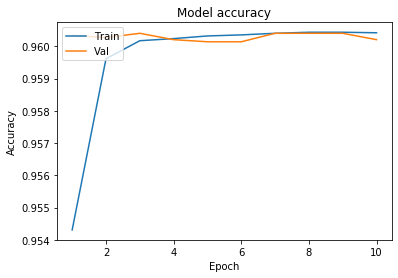

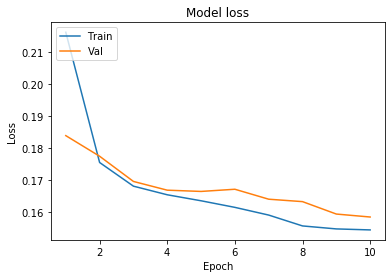

In [68]:
plot_learningCurve(history, 10)